# Mobile App Category Prediction Home Task

## Data Analysis

In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
import pandas
import matplotlib.pyplot as plt

In [3]:
df = pandas.read_csv('./labeld_data.csv')

In [4]:
df.columns.to_list()

['Unnamed: 0',
 'appId',
 'category',
 'title',
 'summary',
 'description',
 'ratings',
 'reviews',
 'scoreText',
 'developerAddress',
 'contentRating',
 'adSupported']

In [5]:
df[["category"]].describe()

,category
count,1514
unique,9
top,photography_collage_posters
freq,347


In [6]:
stat_desc = df.groupby("category").describe()

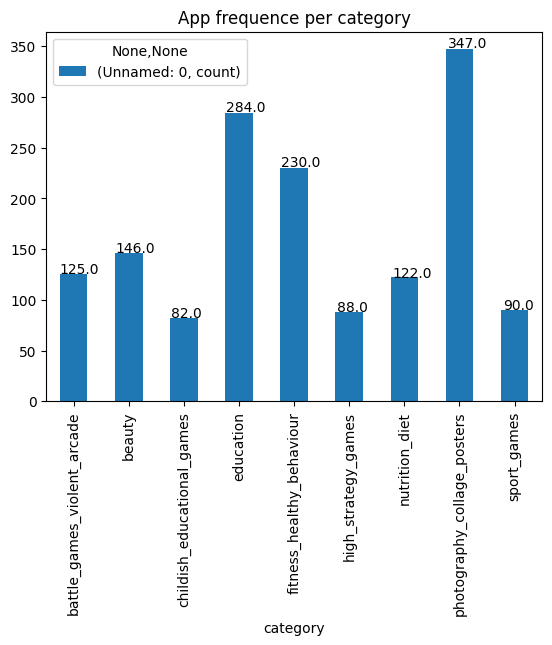

In [7]:
ax = stat_desc.plot(y=('Unnamed: 0', 'count'), kind="bar", title="App frequence per category")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

It can be considered as the category samples are balanced.

## Selecting the Embedding Method


### Embedding with text-embedding-3-small

##### Selected Features: title, summary, description
##### Embedding: text-embedding-3-small
##### Combining the features into one text description, and produce the text embedding. Embedding is fed into the classification layers.

In [8]:
!pip install openai
!pip install tiktoken
!pip install typing-extensions --upgrade

import openai
import tiktoken

Requirement already up-to-date: typing-extensions in ./vp1/lib/python3.8/site-packages (4.10.0)


In [9]:
client = openai.OpenAI(api_key = "xxx")

def get_embedding_openai(text, model="text-embedding-3-small"):
    text = text.replace('\n', ' ')
    return client.embeddings.create(input = [text], model=model).data[0].embedding


In [10]:
df_features = df[["category", "title", "summary", "description"]]
df_features = df_features.fillna('')
df_features

,category,title,summary,description
0,childish_educational_games,Vlad and Niki – games & videos,Educational video channel and puzzle games for...,Vlad & Niki is the free official app with funn...
1,fitness_healthy_behaviour,Sorteia Time,A simple way to draw teams,"1 - Enter all the names, one on each line.\n2 ..."
2,childish_educational_games,Read Along by Google,Learn to read with the magic of your voice and...,Read Along is a free reading app for Android t...
3,education,All Language Voice Translator,Instant Translate English Voice Translator Tra...,Introducing our English Voice Translator voice...
4,education,Official Car/Bike DTT Ireland,PASS YOUR CAR / MOTORCYCLE THEORY TEST FIRST T...,The only official driver theory test preparati...
...,...,...,...,...
1509,fitness_healthy_behaviour,Withings Health Mate,Monitor your health with Withings products,"Whether you’re looking to lose weight, get mor..."
1510,fitness_healthy_behaviour,Fabulous Daily Routine Planner,"Self-care routine for lifestyle change, settin...",Welcome to the world of Fabulous. Unlock the p...
1511,high_strategy_games,Catan Universe,"Build roads and cities, negotiate skillfully a...",Play your favorite game CATAN anytime and anyw...
1512,battle_games_violent_arcade,Crossout Mobile - PvP Action,"Build your indestructible battle сar, win in v...",Crossout Mobile is a legendary MMO-action game...


In [11]:
df_features["combined"] = "title: " + df_features.title.str.strip() + ";summary: " + df_features.summary.str.strip() + ";description: " + df_features.description.str.strip()
df_features

,category,title,summary,description,combined
0,childish_educational_games,Vlad and Niki – games & videos,Educational video channel and puzzle games for...,Vlad & Niki is the free official app with funn...,title: Vlad and Niki – games & videos;summary:...
1,fitness_healthy_behaviour,Sorteia Time,A simple way to draw teams,"1 - Enter all the names, one on each line.\n2 ...",title: Sorteia Time;summary: A simple way to d...
2,childish_educational_games,Read Along by Google,Learn to read with the magic of your voice and...,Read Along is a free reading app for Android t...,title: Read Along by Google;summary: Learn to ...
3,education,All Language Voice Translator,Instant Translate English Voice Translator Tra...,Introducing our English Voice Translator voice...,title: All Language Voice Translator;summary: ...
4,education,Official Car/Bike DTT Ireland,PASS YOUR CAR / MOTORCYCLE THEORY TEST FIRST T...,The only official driver theory test preparati...,title: Official Car/Bike DTT Ireland;summary: ...
...,...,...,...,...,...
1509,fitness_healthy_behaviour,Withings Health Mate,Monitor your health with Withings products,"Whether you’re looking to lose weight, get mor...",title: Withings Health Mate;summary: Monitor y...
1510,fitness_healthy_behaviour,Fabulous Daily Routine Planner,"Self-care routine for lifestyle change, settin...",Welcome to the world of Fabulous. Unlock the p...,title: Fabulous Daily Routine Planner;summary:...
1511,high_strategy_games,Catan Universe,"Build roads and cities, negotiate skillfully a...",Play your favorite game CATAN anytime and anyw...,title: Catan Universe;summary: Build roads and...
1512,battle_games_violent_arcade,Crossout Mobile - PvP Action,"Build your indestructible battle сar, win in v...",Crossout Mobile is a legendary MMO-action game...,title: Crossout Mobile - PvP Action;summary: B...


In [12]:
embedding_encoding = "cl100k_base"
encoding = tiktoken.get_encoding(embedding_encoding)

df_features["n_tokens"] = df_features.combined.apply(lambda x: len(encoding.encode(x)))
df_features

,category,title,summary,description,combined,n_tokens
0,childish_educational_games,Vlad and Niki – games & videos,Educational video channel and puzzle games for...,Vlad & Niki is the free official app with funn...,title: Vlad and Niki – games & videos;summary:...,473
1,fitness_healthy_behaviour,Sorteia Time,A simple way to draw teams,"1 - Enter all the names, one on each line.\n2 ...",title: Sorteia Time;summary: A simple way to d...,51
2,childish_educational_games,Read Along by Google,Learn to read with the magic of your voice and...,Read Along is a free reading app for Android t...,title: Read Along by Google;summary: Learn to ...,459
3,education,All Language Voice Translator,Instant Translate English Voice Translator Tra...,Introducing our English Voice Translator voice...,title: All Language Voice Translator;summary: ...,794
4,education,Official Car/Bike DTT Ireland,PASS YOUR CAR / MOTORCYCLE THEORY TEST FIRST T...,The only official driver theory test preparati...,title: Official Car/Bike DTT Ireland;summary: ...,121
...,...,...,...,...,...,...
1509,fitness_healthy_behaviour,Withings Health Mate,Monitor your health with Withings products,"Whether you’re looking to lose weight, get mor...",title: Withings Health Mate;summary: Monitor y...,620
1510,fitness_healthy_behaviour,Fabulous Daily Routine Planner,"Self-care routine for lifestyle change, settin...",Welcome to the world of Fabulous. Unlock the p...,title: Fabulous Daily Routine Planner;summary:...,657
1511,high_strategy_games,Catan Universe,"Build roads and cities, negotiate skillfully a...",Play your favorite game CATAN anytime and anyw...,title: Catan Universe;summary: Build roads and...,740
1512,battle_games_violent_arcade,Crossout Mobile - PvP Action,"Build your indestructible battle сar, win in v...",Crossout Mobile is a legendary MMO-action game...,title: Crossout Mobile - PvP Action;summary: B...,610


In [13]:
import os
if os.path.exists('text-embedding-3-small.csv'):
    df_features = pandas.read_csv('text-embedding-3-small.csv')
else:
    df_features['text-embedding-3-small'] = df_features.combined.apply(lambda x: get_embedding_openai(x, model='text-embedding-3-small'))

df_features

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,category,title,summary,description,combined,n_tokens,text-embidding-3-small
0,0,0,0,childish_educational_games,Vlad and Niki – games & videos,Educational video channel and puzzle games for...,Vlad & Niki is the free official app with funn...,title: Vlad and Niki – games & videos;summary:...,473,"[0.02033662237226963, 0.018897272646427155, -0..."
1,1,1,1,fitness_healthy_behaviour,Sorteia Time,A simple way to draw teams,"1 - Enter all the names, one on each line.\n2 ...",title: Sorteia Time;summary: A simple way to d...,51,"[-0.011573431082069874, -0.009042182937264442,..."
2,2,2,2,childish_educational_games,Read Along by Google,Learn to read with the magic of your voice and...,Read Along is a free reading app for Android t...,title: Read Along by Google;summary: Learn to ...,459,"[-0.004118654876947403, 0.0171563271433115, -0..."
3,3,3,3,education,All Language Voice Translator,Instant Translate English Voice Translator Tra...,Introducing our English Voice Translator voice...,title: All Language Voice Translator;summary: ...,794,"[-0.028328215703368187, -0.0028187779244035482..."
4,4,4,4,education,Official Car/Bike DTT Ireland,PASS YOUR CAR / MOTORCYCLE THEORY TEST FIRST T...,The only official driver theory test preparati...,title: Official Car/Bike DTT Ireland;summary: ...,121,"[0.02638806216418743, 0.015565711073577404, -0..."
...,...,...,...,...,...,...,...,...,...,...
1509,1509,1509,1509,fitness_healthy_behaviour,Withings Health Mate,Monitor your health with Withings products,"Whether you’re looking to lose weight, get mor...",title: Withings Health Mate;summary: Monitor y...,620,"[0.034520357847213745, 0.07873239368200302, 0...."
1510,1510,1510,1510,fitness_healthy_behaviour,Fabulous Daily Routine Planner,"Self-care routine for lifestyle change, settin...",Welcome to the world of Fabulous. Unlock the p...,title: Fabulous Daily Routine Planner;summary:...,657,"[0.007525527849793434, 0.0025289037730544806, ..."
1511,1511,1511,1511,high_strategy_games,Catan Universe,"Build roads and cities, negotiate skillfully a...",Play your favorite game CATAN anytime and anyw...,title: Catan Universe;summary: Build roads and...,740,"[-0.0066569773480296135, 0.0004915384342893958..."
1512,1512,1512,1512,battle_games_violent_arcade,Crossout Mobile - PvP Action,"Build your indestructible battle сar, win in v...",Crossout Mobile is a legendary MMO-action game...,title: Crossout Mobile - PvP Action;summary: B...,610,"[0.0041349041275680065, 0.04264552518725395, 0..."


In [14]:
df_features.to_csv("text-embedding-3-small.csv")

### Embedding with Instructor-Large

##### Selected Features: title, summary, description
##### Embedding: instructor-large from HF
##### Combining the features into one text description, and produce the text embedding. Embedding is fed into the classification layers.

In [15]:
!pip install torch
!pip install transformers
!pip install -U sentence-transformers==2.2.2
!pip install numpy
!pip install tqdm
!pip install instructorembedding

Requirement already up-to-date: sentence-transformers==2.2.2 in ./vp1/lib/python3.8/site-packages (2.2.2)


In [60]:
from InstructorEmbedding import INSTRUCTOR

model = INSTRUCTOR('hkunlp/instructor-large')

load INSTRUCTOR_Transformer
max_seq_length  512


In [61]:
if os.path.exists("instructor-large.xlsx"):
    df_features = pandas.read_csv("instructor-large.xlsx")
else:
    df_features['instructor-large'] = df_features.combined.apply(lambda x: model.encode(x))
df_features

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,category,title,summary,description,combined,n_tokens,text-embidding-3-small,instructor-large,roberta
0,0,0,0,childish_educational_games,Vlad and Niki – games & videos,Educational video channel and puzzle games for...,Vlad & Niki is the free official app with funn...,title: Vlad and Niki – games & videos;summary:...,473,"[0.02033662237226963, 0.018897272646427155, -0...","[-0.021379013, 0.0070134155, 0.028926112, 0.00...",[[[-0.0309714 0.09263957 -0.01135899 ... -0....
1,1,1,1,fitness_healthy_behaviour,Sorteia Time,A simple way to draw teams,"1 - Enter all the names, one on each line.\n2 ...",title: Sorteia Time;summary: A simple way to d...,51,"[-0.011573431082069874, -0.009042182937264442,...","[0.0028708647, -0.011021791, 0.020873968, 0.01...",[[[-0.08710162 0.0973013 0.02358727 ... -0....
2,2,2,2,childish_educational_games,Read Along by Google,Learn to read with the magic of your voice and...,Read Along is a free reading app for Android t...,title: Read Along by Google;summary: Learn to ...,459,"[-0.004118654876947403, 0.0171563271433115, -0...","[-0.026260454, -0.011677123, 0.0023360334, 0.0...",[[[-0.01846936 0.11465285 -0.00115171 ... -0....
3,3,3,3,education,All Language Voice Translator,Instant Translate English Voice Translator Tra...,Introducing our English Voice Translator voice...,title: All Language Voice Translator;summary: ...,794,"[-0.028328215703368187, -0.0028187779244035482...","[-0.030149475, 0.007016643, -0.01888516, 0.029...",[[[-0.03660905 0.10258827 -0.01069514 ... -0....
4,4,4,4,education,Official Car/Bike DTT Ireland,PASS YOUR CAR / MOTORCYCLE THEORY TEST FIRST T...,The only official driver theory test preparati...,title: Official Car/Bike DTT Ireland;summary: ...,121,"[0.02638806216418743, 0.015565711073577404, -0...","[-0.02490612, -0.006967714, -0.0077033406, 0.0...",[[[-0.06846243 0.05546848 -0.02715554 ... -0....
...,...,...,...,...,...,...,...,...,...,...,...,...
1509,1509,1509,1509,fitness_healthy_behaviour,Withings Health Mate,Monitor your health with Withings products,"Whether you’re looking to lose weight, get mor...",title: Withings Health Mate;summary: Monitor y...,620,"[0.034520357847213745, 0.07873239368200302, 0....","[-0.019196197, 0.002670093, 0.032371096, 0.010...",[[[-1.14016337e-02 8.35975781e-02 -1.27183385...
1510,1510,1510,1510,fitness_healthy_behaviour,Fabulous Daily Routine Planner,"Self-care routine for lifestyle change, settin...",Welcome to the world of Fabulous. Unlock the p...,title: Fabulous Daily Routine Planner;summary:...,657,"[0.007525527849793434, 0.0025289037730544806, ...","[-0.0149033135, -0.005051411, 0.012666071, 0.0...",[[[-3.69887538e-02 1.12851575e-01 2.99063250...
1511,1511,1511,1511,high_strategy_games,Catan Universe,"Build roads and cities, negotiate skillfully a...",Play your favorite game CATAN anytime and anyw...,title: Catan Universe;summary: Build roads and...,740,"[-0.0066569773480296135, 0.0004915384342893958...","[-0.062017024, -0.010176477, -0.022335827, 0.0...",[[[-0.03831197 0.08016801 0.00296424 ... -0....
1512,1512,1512,1512,battle_games_violent_arcade,Crossout Mobile - PvP Action,"Build your indestructible battle сar, win in v...",Crossout Mobile is a legendary MMO-action game...,title: Crossout Mobile - PvP Action;summary: B...,610,"[0.0041349041275680065, 0.04264552518725395, 0...","[-0.019195525, 0.0014616303, -0.04852745, -0.0...",[[[-0.06137265 0.07237633 -0.0048704 ... 0....


In [62]:
df_features.to_csv("instructor-large.xlsx")

### Embedding with RoBERTa


##### Selected Features: title, summary, description
##### Embedding: roberta multilingual model as the backbone for embedding
##### Combining the features into one text description, and produce the text embedding. Embedding is fed into the classification layers.

In [63]:
#!pip install tensorflow==2.2.0

from transformers import AutoTokenizer, RobertaModel
import torch

In [64]:
tokenizer = AutoTokenizer.from_pretrained("FacebookAI/roberta-base")
model = RobertaModel.from_pretrained("FacebookAI/roberta-base")
max_n_tokens = df_features["n_tokens"].max()

tokenizer.model_max_length, max_n_tokens

Some weights of RobertaModel were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


(512, 1338)

In [65]:
def get_embedding_roberta(text):
    inputs = tokenizer(text, return_tensors="pt", padding='max_length', truncation=True, max_length=512)
    outputs = model(**inputs)
    last_hidden_states = outputs.last_hidden_state.detach().numpy()

    return last_hidden_states

In [66]:
if os.path.exists("roberta.xlsx"):
    df_features = pandas.read_csv("roberta.xlsx")
else:
    df_features['roberta'] = df_features.combined.apply(lambda x: get_embedding_roberta(x))
df_features

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,category,title,summary,description,combined,n_tokens,text-embidding-3-small,instructor-large,roberta
0,0,0,0,childish_educational_games,Vlad and Niki – games & videos,Educational video channel and puzzle games for...,Vlad & Niki is the free official app with funn...,title: Vlad and Niki – games & videos;summary:...,473,"[0.02033662237226963, 0.018897272646427155, -0...","[-0.021379013, 0.0070134155, 0.028926112, 0.00...","[[[-0.030971402, 0.092639565, -0.011358986, -0..."
1,1,1,1,fitness_healthy_behaviour,Sorteia Time,A simple way to draw teams,"1 - Enter all the names, one on each line.\n2 ...",title: Sorteia Time;summary: A simple way to d...,51,"[-0.011573431082069874, -0.009042182937264442,...","[0.0028708647, -0.011021791, 0.020873968, 0.01...","[[[-0.08710162, 0.0973013, 0.02358727, -0.0879..."
2,2,2,2,childish_educational_games,Read Along by Google,Learn to read with the magic of your voice and...,Read Along is a free reading app for Android t...,title: Read Along by Google;summary: Learn to ...,459,"[-0.004118654876947403, 0.0171563271433115, -0...","[-0.026260454, -0.011677123, 0.0023360334, 0.0...","[[[-0.018469356, 0.11465285, -0.0011517073, -0..."
3,3,3,3,education,All Language Voice Translator,Instant Translate English Voice Translator Tra...,Introducing our English Voice Translator voice...,title: All Language Voice Translator;summary: ...,794,"[-0.028328215703368187, -0.0028187779244035482...","[-0.030149475, 0.007016643, -0.01888516, 0.029...","[[[-0.03660905, 0.102588266, -0.010695135, -0...."
4,4,4,4,education,Official Car/Bike DTT Ireland,PASS YOUR CAR / MOTORCYCLE THEORY TEST FIRST T...,The only official driver theory test preparati...,title: Official Car/Bike DTT Ireland;summary: ...,121,"[0.02638806216418743, 0.015565711073577404, -0...","[-0.02490612, -0.006967714, -0.0077033406, 0.0...","[[[-0.06846243, 0.055468485, -0.027155543, -0...."
...,...,...,...,...,...,...,...,...,...,...,...,...
1509,1509,1509,1509,fitness_healthy_behaviour,Withings Health Mate,Monitor your health with Withings products,"Whether you’re looking to lose weight, get mor...",title: Withings Health Mate;summary: Monitor y...,620,"[0.034520357847213745, 0.07873239368200302, 0....","[-0.019196197, 0.002670093, 0.032371096, 0.010...","[[[-0.011401634, 0.08359758, -0.0127183385, -0..."
1510,1510,1510,1510,fitness_healthy_behaviour,Fabulous Daily Routine Planner,"Self-care routine for lifestyle change, settin...",Welcome to the world of Fabulous. Unlock the p...,title: Fabulous Daily Routine Planner;summary:...,657,"[0.007525527849793434, 0.0025289037730544806, ...","[-0.0149033135, -0.005051411, 0.012666071, 0.0...","[[[-0.036988754, 0.112851575, 0.029906325, -0...."
1511,1511,1511,1511,high_strategy_games,Catan Universe,"Build roads and cities, negotiate skillfully a...",Play your favorite game CATAN anytime and anyw...,title: Catan Universe;summary: Build roads and...,740,"[-0.0066569773480296135, 0.0004915384342893958...","[-0.062017024, -0.010176477, -0.022335827, 0.0...","[[[-0.038311973, 0.08016801, 0.0029642405, -0...."
1512,1512,1512,1512,battle_games_violent_arcade,Crossout Mobile - PvP Action,"Build your indestructible battle сar, win in v...",Crossout Mobile is a legendary MMO-action game...,title: Crossout Mobile - PvP Action;summary: B...,610,"[0.0041349041275680065, 0.04264552518725395, 0...","[-0.019195525, 0.0014616303, -0.04852745, -0.0...","[[[-0.06137265, 0.072376326, -0.004870402, -0...."


In [68]:
df_features.to_csv("roberta.xlsx")

## Classification


In [69]:
import numpy as np
import ast

In [70]:
df_train = []
df_test = []

for cat in df_features["category"].unique():
    print(cat)
    temp_df = df_features[df_features["category"] == cat]

    df_test.append(temp_df.head(15))
    df_train.append(temp_df.tail(len(temp_df) - 15))

df_train = pandas.concat(df_train)
df_test = pandas.concat(df_test)

childish_educational_games
fitness_healthy_behaviour
education
battle_games_violent_arcade
nutrition_diet
photography_collage_posters
beauty
high_strategy_games
sport_games


### classifier with text-embedding-3-small

In [141]:
x_data_train = df_train["text-embidding-3-small"].to_list()
x_data_train = np.array([ast.literal_eval(i) for i in x_data_train])
x_data_test = df_test["text-embidding-3-small"].to_list()
x_data_test = np.array([ast.literal_eval(i) for i in x_data_test])

y_data_train = df_train["category"].to_list()
y_data_train = pandas.get_dummies(y_data_train).to_numpy().astype(np.float32)
y_data_test = df_test["category"].to_list()
y_data_test = pandas.get_dummies(y_data_test).to_numpy().astype(np.float32)

print(len(x_data_train) / len(df_features) * 100, "%")
print(len(x_data_test) / len(df_features) * 100, "%")

91.08322324966976 %
8.91677675033025 %


In [142]:
!pip install keras
!pip install tensorflow

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [158]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [159]:
x_data_train.shape, y_data_train.shape, x_data_test.shape, y_data_test.shape

((1379, 1536), (1379, 9), (135, 1536), (135, 9))

In [160]:
def model_dense_classifier(input_shape):
    model = Sequential()
    #model.add(Dense(1024, input_shape=input_shape, activation='relu'))
    model.add(Dense(128, input_shape=input_shape, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(9, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
    return model

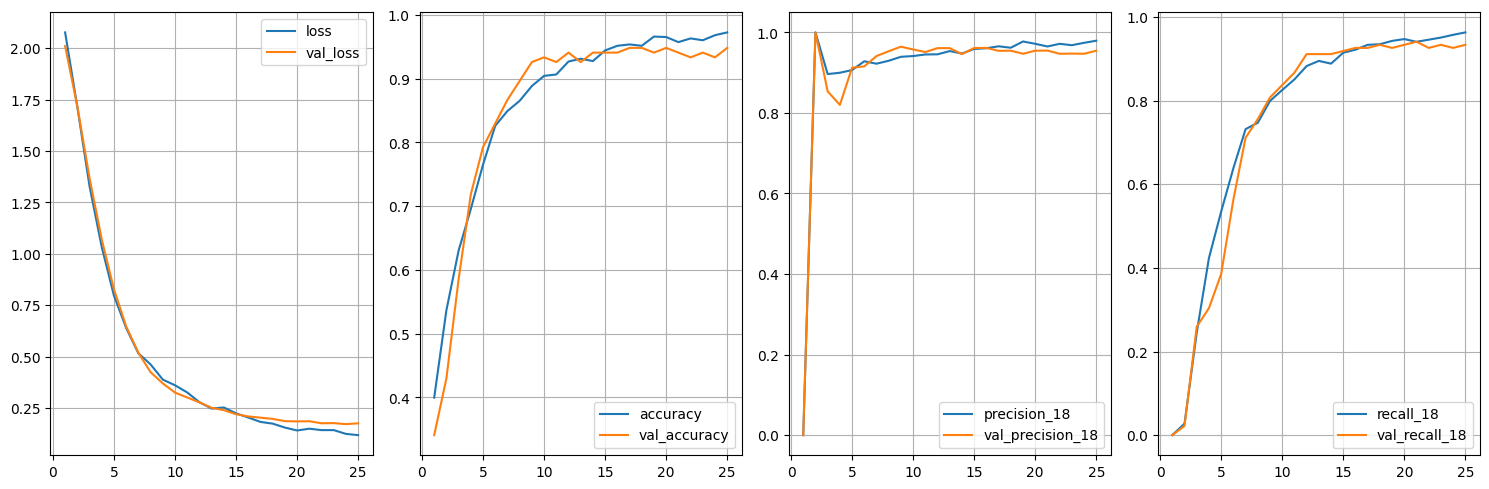

11/11 [==============================] - 2s 162ms/step - loss: 0.1173 - accuracy: 0.9724 - precision_18: 0.9794 - recall_18: 0.9630 - val_loss: 0.1748 - val_accuracy: 0.9481 - val_precision_18: 0.9545 - val_recall_18: 0.9333


In [173]:
model_openai = model_dense_classifier((1536,))

from PlotLearning import PlotLearning
model_openai.fit(x=x_data_train, y=y_data_train, validation_data=(x_data_test, y_data_test), batch_size=128, epochs=25, callbacks=[PlotLearning()])

In [174]:
model_openai.save('openai_classifier.h5')

/home/user1/Documents/vp1/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### classifier with Instructor-Large


In [135]:
x_data_train = np.array(df_train["instructor-large"].to_list())
x_data_test = np.array(df_test["instructor-large"].to_list())

y_data_train = df_train["category"].to_list()
y_data_train = pandas.get_dummies(y_data_train).to_numpy().astype(np.float32)
y_data_test = df_test["category"].to_list()
y_data_test = pandas.get_dummies(y_data_test).to_numpy().astype(np.float32)

print(len(x_data_train) / len(df_features) * 100, "%")
print(len(x_data_test) / len(df_features) * 100, "%")

x_data_train.shape, y_data_train.shape, x_data_test.shape, y_data_test.shape

91.08322324966976 %
8.91677675033025 %


((1379, 768), (1379, 9), (135, 768), (135, 9))

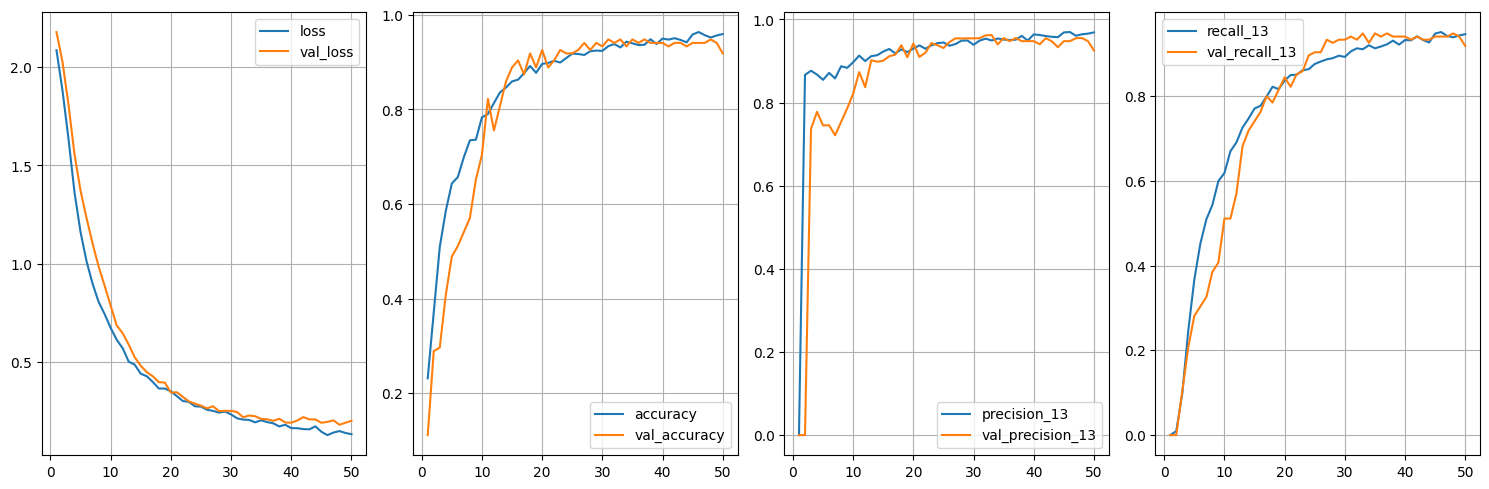

22/22 [==============================] - 2s 73ms/step - loss: 0.1342 - accuracy: 0.9594 - precision_13: 0.9688 - recall_13: 0.9463 - val_loss: 0.2024 - val_accuracy: 0.9185 - val_precision_13: 0.9254 - val_recall_13: 0.9185


In [136]:
model_instructor_large = model_dense_classifier((768,))
model_instructor_large.fit(x=x_data_train, y=y_data_train, validation_data=(x_data_test, y_data_test), batch_size=64, epochs=50, callbacks=[PlotLearning()])

In [137]:
model_instructor_large.save('instructor_large_classifier.h5')

/home/user1/Documents/vp1/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### classifier with roberta

In [72]:
x_data_train = np.array(df_train["roberta"].to_list())
x_data_test = np.array(df_test["roberta"].to_list())

y_data_train = df_train["category"].to_list()
y_data_train = pandas.get_dummies(y_data_train).to_numpy().astype(np.float32)
y_data_test = df_test["category"].to_list()
y_data_test = pandas.get_dummies(y_data_test).to_numpy().astype(np.float32)

print(len(x_data_train) / len(df_features) * 100, "%")
print(len(x_data_test) / len(df_features) * 100, "%")

x_data_train.shape, y_data_train.shape, x_data_test.shape, y_data_test.shape

91.08322324966976 %
8.91677675033025 %


((1379, 1, 512, 768), (1379, 9), (135, 1, 512, 768), (135, 9))

In [73]:
def model_roberta_classifier(input_shape):
    model = Sequential()
    #model.add(Dense(1024, input_shape=input_shape, activation='relu'))
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(9, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

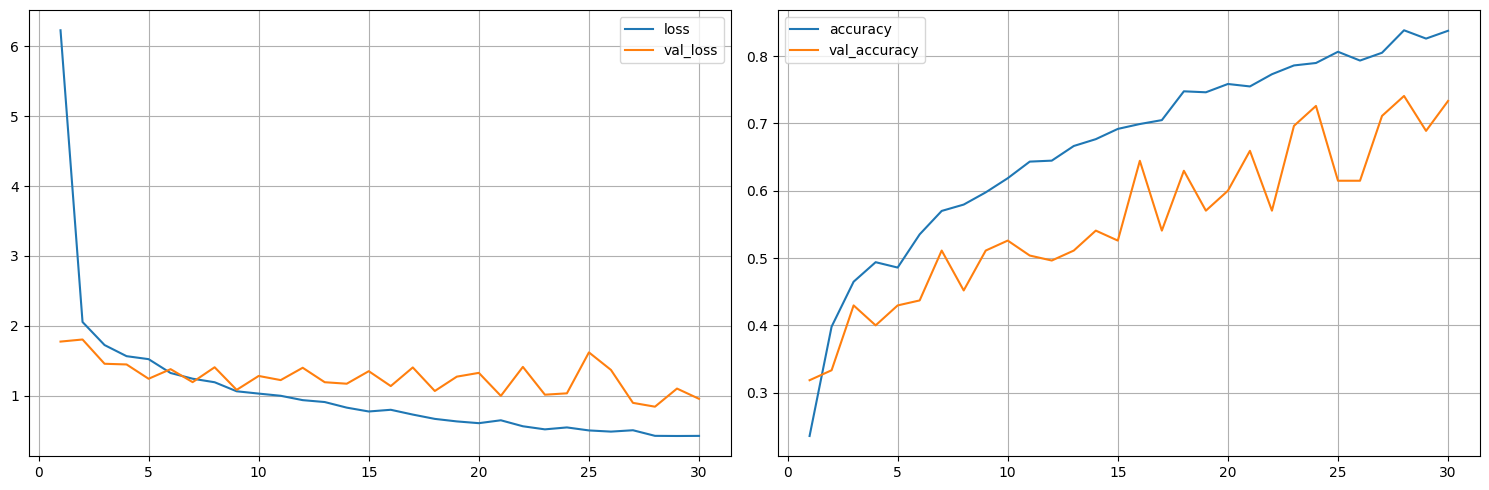

22/22 [==============================] - 8s 363ms/step - loss: 0.4233 - accuracy: 0.8376 - val_loss: 0.9539 - val_accuracy: 0.7333


In [74]:
model_roberta = model_roberta_classifier((1, 512, 768))
model_roberta.fit(x=x_data_train, y=y_data_train, validation_data=(x_data_test, y_data_test), batch_size=64, epochs=30, callbacks=[PlotLearning()])

## Evaluation

Evaluation is performed by the text-embedding-3-small + classifier.
Here the point is to evaluate the precision and recall. And select a good threshold of the classification scores to maximize the precision in the case of unknown category apps.

In [175]:
import openai
import tiktoken
from keras.models import load_model

In [176]:
client = openai.OpenAI(api_key = "xxx")

In [177]:
classifier = load_model("openai_classifier.h5")
classifier.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 128)               196736    
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_59 (Dense)            (None, 9)                 585       
                                                                 
Total params: 205577 (803.04 KB)
Trainable params: 205577 (803.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Precision/Recall

In [152]:
x_data_train = df_train["text-embidding-3-small"].to_list()
x_data_train = np.array([ast.literal_eval(i) for i in x_data_train])
x_data_test = df_test["text-embidding-3-small"].to_list()
x_data_test = np.array([ast.literal_eval(i) for i in x_data_test])

y_data_train = df_train["category"].to_list()
y_data_train = pandas.get_dummies(y_data_train).to_numpy().astype(np.float32)
y_data_test = df_test["category"].to_list()
y_data_test = pandas.get_dummies(y_data_test).to_numpy().astype(np.float32)

print(len(x_data_train) / len(df_features) * 100, "%")
print(len(x_data_test) / len(df_features) * 100, "%")

91.08322324966976 %
8.91677675033025 %


In [178]:
loss, accuracy, precision, recall = classifier.evaluate(x_data_test, y_data_test, verbose=0)
print("Precision: {}, Recall: {}".format(precision, recall))

Precision: 0.9545454382896423, Recall: 0.9333333373069763


In [179]:
y_pred = classifier.predict(x_data_test)
y_pred_classes = np.argmax(y_pred, axis=1)

5/5 [==============================] - 0s 3ms/step


In [180]:
from sklearn.metrics import classification_report

In [181]:
y_test_classes = np.argmax(y_data_test, axis=1)
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.93      0.87      0.90        15
           2       0.94      1.00      0.97        15
           3       1.00      0.93      0.97        15
           4       0.93      0.93      0.93        15
           5       1.00      1.00      1.00        15
           6       1.00      0.93      0.97        15
           7       0.82      0.93      0.87        15
           8       1.00      0.93      0.97        15

    accuracy                           0.95       135
   macro avg       0.95      0.95      0.95       135
weighted avg       0.95      0.95      0.95       135



## Classification score threshold

In [191]:
score_train = classifier.predict(x_data_train)
score_test = classifier.predict(x_data_test)

min_train_positive = min(np.amax(score_train, axis=1))
min_test_positive = min(np.amax(score_test, axis=1))

max_train_negative = max(np.partition(score_train, -2, axis=1)[:,-2])
max_test_negative = max(np.partition(score_test, -2, axis=1)[:,-2])

print(min_train_positive, min_test_positive)
print(max_train_negative, max_test_negative)

#unknown_score_threshold = (min(min_train_positive, min_test_positive) + max(max_train_negative, max_test_negative)) / 2
unknown_score_threshold = (min_train_positive + max_train_negative) / 2
unknown_score_threshold

5/5 [==============================] - 0s 3ms/step
0.50214887 0.3347334
0.49671346 0.4782476


0.49943116307258606

## Result in Prediction of the categories for predictions.csv

In [187]:
df_pre = pandas.read_csv('predictions.csv')
df_pre = df_pre.fillna('')

In [192]:
def predict_app_category(appId, title, summary, description, ratings=0, scoreText=0, developerAddress="", contentRating="", adSupported=False):
    text = "title: " + title + ";summary: " + summary + ";description: " + description
    embedding = np.array([get_embedding_openai(text, model="text-embedding-3-small")])
    cls = classifier.predict(embedding)
    return np.argmax(cls[0]), np.max(cls[0])

In [193]:
category_list = sorted(df_features["category"].unique())

category_column = []
unknown_apps = []
for index, app in df_pre.iterrows():
    cls, score = predict_app_category(app["appId"], app["title"], app["summary"], app["description"])
    category = category_list[cls] if score >= unknown_score_threshold else "unknown category"
    category_column.append(category)
    if category == "unknown category":
        print(app["appId"], "unknown category")
        unknown_apps.append((app["appId"], score))

1/1 [==============================] - 0s 45ms/step
com.filmaeumobile unknown category
1/1 [==============================] - 0s 37ms/step
com.infoland.mosquito_repellent unknown category
1/1 [==============================] - 0s 36ms/step
com.samsung.app.highlightplayer unknown category
1/1 [==============================] - 0s 37ms/step
com.program.allyoucanfacev2.app unknown category
1/1 [==============================] - 0s 38ms/step
com.bilibili.comic.intl unknown category
1/1 [==============================] - 0s 38ms/step
com.Funimation.FunimationNow unknown category
1/1 [==============================] - 0s 38ms/step
kr.co.dwci.yulhyulgangho unknown category
1/1 [==============================] - 0s 37ms/step
com.nexusmanga.reader.gpen unknown category
1/1 [==============================] - 0s 36ms/step
com.nwz.ichampclient unknown category
1/1 [==============================] - 0s 40ms/step
com.atomiclocs.love.test unknown category
1/1 [==============================] - 0s 37m

In [195]:
print(unknown_apps)
print("unkown_category_apps: {}".format(len(unknown_apps)))
df_pre["category"] = category_column
df_pre.to_csv("predictions_with_category.csv", index=False)

[('com.filmaeumobile', 0.41056234), ('com.infoland.mosquito_repellent', 0.4896125), ('com.samsung.app.highlightplayer', 0.44883224), ('com.program.allyoucanfacev2.app', 0.24475104), ('com.bilibili.comic.intl', 0.32491347), ('com.Funimation.FunimationNow', 0.45242026), ('kr.co.dwci.yulhyulgangho', 0.33045346), ('com.nexusmanga.reader.gpen', 0.38953945), ('com.nwz.ichampclient', 0.37488145), ('com.atomiclocs.love.test', 0.34206483), ('com.superlive.liveapp', 0.43913394), ('com.jovempan.panflix', 0.40415028), ('com.game.whatdoyoumeme', 0.48809463), ('pt.cosmicode.guessup', 0.46471193), ('com.atv.animetv.animesplay', 0.36353213), ('com.greenfilestudios.YesOrNo', 0.35390738), ('com.cube.arc.pfa', 0.37509987), ('com.tencent.wesing', 0.2684677), ('com.pinterest.twa', 0.4037216), ('com.bookpalcomics.secretlove', 0.36783615), ('cn.gem.android', 0.47961664), ('com.litatom.lite', 0.44002983), ('com.engine.sounds.supercar', 0.3979056), ('com.rodolfogs.nextdooralerts', 0.34607115), ('com.playstatio

## Conclusion

This is a typical multi-class classification problem.

#### Classifer Model Architecture/Build

Regarding the the input feature I selected only 3 text fields that decribe the app charateristic relevantely - "title", "summary", "description". Others are excluded. "addSupport" field could be considered as an input feature(categorical), but it is also less relevant.
Selected input features are all in text format and combined into one text blob to be fed into the classification model.


The prediction model architecture is in ("text embedding" + "dense classifer"). I performed 3 different text embedding models to extract text feature map from the combined description input feature. Experimented text embeddings are all multilingual large text embedding architectures with attentions - openai's text-bembdding-3-small, Instructor-Large, and RoBERTa.
Once embedding is extracted, it is densely connected to the classier layers. These are dense layers and the last layer is softmax activation to predict the probability score values of categories.

<img src="model_architecture.png" alt="Alternative text" />

For training, categorical crossentropy is used as the loss function. For the optimizer adam is used.
Training set is configured by 1379 labeld samples. Evaluation set is configured by 135 samples - 15 samples from each category.

For the embeddings performance comparison text-embedding-3-small(1536 dimension) is considered as the best one.

#### Evaluation

Evaluation target is for pecision and recall on the evaluation dataset configure by 15 samples per category from the labeled set. These samples are not in the training set.

                precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.93      0.87      0.90        15
           2       0.94      1.00      0.97        15
           3       1.00      0.93      0.97        15
           4       0.93      0.93      0.93        15
           5       1.00      1.00      1.00        15
           6       1.00      0.93      0.97        15
           7       0.82      0.93      0.87        15
           8       1.00      0.93      0.97        15

    accuracy                           0.95       135
   macro avg       0.95      0.95      0.95       135
weighted avg       0.95      0.95      0.95       135

For average precision/recall it is 0.95/0.95. Class "photography_collage_poster" has 0.82 precision and others are in 0.9~1.0.

#### Prediction


Using the trained classifier, category probability scores are predicted. Here a threshold is set to the top confidence score value, regarding there are unknown category apps.
The threshold is selected as the middle value between the min of the positive scores and the max of the negative scores to maximize the precision.

Selected threshold: 0.49943116307258606

As the result, in the predictions.csv, total 39 apps are predicted as unknown categories.

com.filmaeumobile, 0.41056234

com.infoland.mosquito_repellent, 0.4896125

com.samsung.app.highlightplayer, 0.44883224

com.program.allyoucanfacev2.app, 0.24475104

com.bilibili.comic.intl, 0.32491347

com.Funimation.FunimationNow, 0.45242026

kr.co.dwci.yulhyulgangho, 0.33045346

com.nexusmanga.reader.gpen, 0.38953945

com.nwz.ichampclient, 0.37488145

com.atomiclocs.love.test, 0.34206483

com.superlive.liveapp, 0.43913394

com.jovempan.panflix, 0.40415028

com.game.whatdoyoumeme, 0.48809463

pt.cosmicode.guessup, 0.46471193

com.atv.animetv.animesplay, 0.36353213

com.greenfilestudios.YesOrNo, 0.35390738

com.cube.arc.pfa, 0.37509987

com.tencent.wesing, 0.2684677

com.pinterest.twa, 0.4037216

com.bookpalcomics.secretlove, 0.36783615

cn.gem.android, 0.47961664

com.litatom.lite, 0.44002983

com.engine.sounds.supercar, 0.3979056

com.rodolfogs.nextdooralerts, 0.34607115

com.playstation.knowledge, 0.4105508

com.shujiu.litchat2, 0.43648708

com.chat.joy, 0.4704549

com.yomet.mobile, 0.23000063

com.weieyu.yalla, 0.37440515

com.ETI, 0.34700462

com.camsea.videochat, 0.40431708

com.apluscomics.comics, 0.3103913

com.global.pet.security.global_pet_security_flutter, 0.30836615

com.pointone.buddyglobal, 0.48658162

com.carengine.sounds.simulator, 0.2622482

com.midifun, 0.25368032

com.glive.niki, 0.30986008

com.voicechat.volla, 0.30283418

com.live.aschat, 0.48709852

The predicted categories are saved into predictions_with_category.csv file.